## 課題1 解答例
---
下記座標群から、線形回帰のモデルを作成せよ  
正規分布で散らばった値の線形回帰のb,wを求めるプログラムをTensorFlowで作成せよ　

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [20]:
b_train = -1
w_train = 0.7
#[0.0以上、1.0未満）の乱数が入った(1,100)行列
x_train = np.random.random((1,100))
z = 0.1*np.random.randn(1,100)
#np.random.randn(1,100)は平均0、標準偏差1の正規分布に従う乱数が入った(1,100)行列
t_train = x_train * w_train + b_train + z

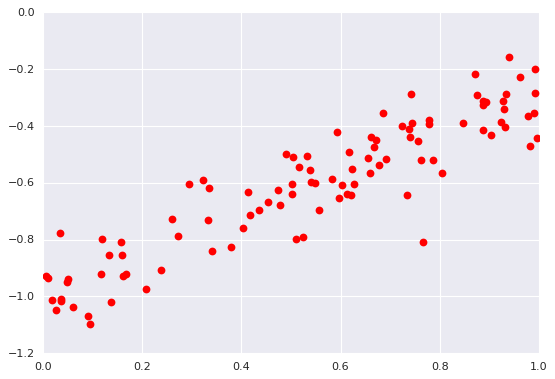

In [21]:
plt.figure(1)
plt.plot(x_train,t_train,'ro',label='Data')
plt.show()

In [22]:
#入力層
x = tf.placeholder(dtype=tf.float32,shape=(None,100),name="input")
t = tf.placeholder(dtype=tf.float32,shape=(None,100))
w = tf.Variable(np.random.randn())
b = tf.Variable(np.random.randn())
#出力層
#回帰問題では活性化関数は恒等関数(何も手を加えず出力する)
p = tf.multiply(x,w) + b

# 回帰問題には損失関数として2乗和誤差を使う
cross_entropy = tf.square(p - t)
loss = tf.reduce_mean(cross_entropy)

# Optimizer
# 勾配降下法 学習率0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.05)
train_op = optimizer.minimize(loss)

# トレーニング回数
train_step = 2500

In [23]:
### 学習の実行
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    i = 0
    for i in range(train_step):
        # トレーニング
        sess.run(train_op, feed_dict={x:x_train,t:t_train})
        # 200ステップごとに途中経過を表示
        if i % 200 == 0:
            loss_output = sess.run(loss, feed_dict={x:x_train, t:t_train})
            w_output = sess.run(w)
            b_output = sess.run(b)
            print "Step %i, cost %f, weight %f, bias %f" % (i, loss_output, w_output, b_output)

Step 0, cost 0.014137, weight 0.915546, bias -1.071243
Step 200, cost 0.009381, weight 0.756875, bias -1.020799
Step 400, cost 0.009185, weight 0.721142, bias -1.000002
Step 600, cost 0.009172, weight 0.712052, bias -0.994712
Step 800, cost 0.009171, weight 0.709739, bias -0.993366
Step 1000, cost 0.009171, weight 0.709151, bias -0.993023
Step 1200, cost 0.009171, weight 0.709002, bias -0.992937
Step 1400, cost 0.009171, weight 0.708964, bias -0.992914
Step 1600, cost 0.009171, weight 0.708955, bias -0.992909
Step 1800, cost 0.009171, weight 0.708955, bias -0.992909
Step 2000, cost 0.009171, weight 0.708955, bias -0.992909
Step 2200, cost 0.009171, weight 0.708955, bias -0.992909
Step 2400, cost 0.009171, weight 0.708955, bias -0.992909


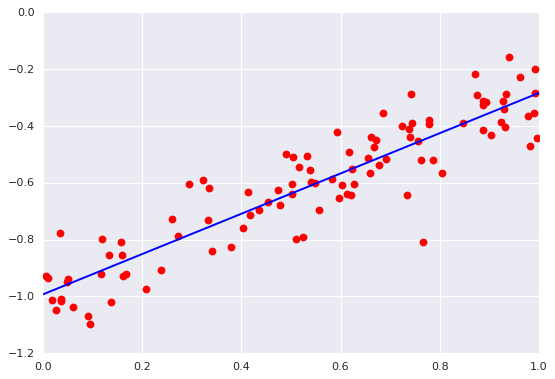

In [24]:
# 得られた w_outputとb_outputでグラフを表示する
x_line = np.linspace(0, 1.0, 100)
t_output = x_line * w_output + b_output
plt.figure()
plt.plot(x_train,t_train,'ro',label='Data')
plt.plot(x_line,t_output,'b-')
plt.show()

## 課題2 解答例
---
下記座標群から、線形回帰のモデルを作成せよ  
非線形に散らばった値の線形回帰のb,wを求めるプログラムをTensorFlowで作成せよ

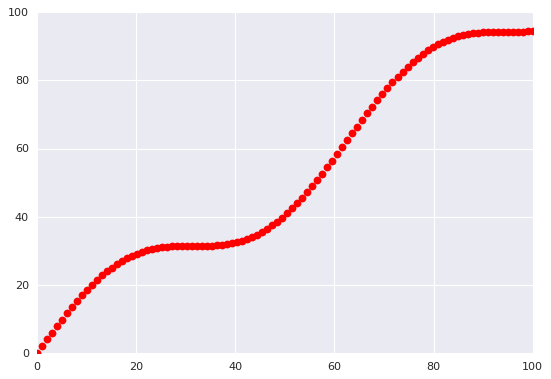

In [6]:
# coding:utf-8
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

x_train = np.linspace(0, 100, 100)
t_train = x_train + 10*np.sin(x_train/10)

plt.figure(1)
plt.plot(x_train, t_train, 'ro', label='Data')
plt.show()

In [7]:
x_train_reshape = x_train.reshape(1,100)
t_train_reshape = t_train.reshape(1,100)

In [16]:
#入力層
x = tf.placeholder(dtype=tf.float32,shape=(None,100),name="input")
t = tf.placeholder(dtype=tf.float32,shape=(None,100))
w = tf.Variable(np.random.randn())
b = tf.Variable(np.random.randn())
#出力層
#回帰問題では活性化関数は恒等関数(何も手を加えず出力する)
p = tf.multiply(x,w) + b

# 回帰問題には損失関数として2乗和誤差を使う
cross_entropy = tf.square(p - t)
loss = tf.reduce_mean(cross_entropy)

# Optimizer
# 勾配降下法 学習率0.01
optimizer = tf.train.AdamOptimizer()
train_op = optimizer.minimize(loss)

# トレーニング回数
train_step = 3000

In [17]:
### 学習の実行
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    i = 0
    for i in range(train_step):
        # トレーニング
        sess.run(train_op, feed_dict={x:x_train_reshape,t:t_train_reshape})
        # 200ステップごとに途中経過を表示
        if i % 200 == 0:
            loss_output = sess.run(loss, feed_dict={x:x_train_reshape, t:t_train_reshape})
            w_output = sess.run(w)
            b_output = sess.run(b)
            print "Step %i, cost %f, weight %f, bias %f" % (i, loss_output, w_output, b_output)

Step 0, cost 2538.256836, weight 1.889541, bias -0.315551
Step 200, cost 1549.519653, weight 1.699705, bias -0.505129
Step 400, cost 892.442017, weight 1.534769, bias -0.669055
Step 600, cost 485.008545, weight 1.395973, bias -0.805808
Step 800, cost 252.855698, weight 1.283786, bias -0.914598
Step 1000, cost 133.474091, weight 1.197580, bias -0.995720
Step 1200, cost 79.097244, weight 1.135278, bias -1.050977
Step 1400, cost 57.551037, weight 1.093351, bias -1.083732
Step 1600, cost 50.240685, weight 1.067299, bias -1.098436
Step 1800, cost 48.138657, weight 1.052441, bias -1.099808
Step 2000, cost 47.619282, weight 1.044683, bias -1.092001
Step 2200, cost 47.491940, weight 1.040943, bias -1.078107
Step 2400, cost 47.440567, weight 1.039218, bias -1.060093
Step 2600, cost 47.398129, weight 1.038373, bias -1.038995
Step 2800, cost 47.353214, weight 1.037850, bias -1.015235


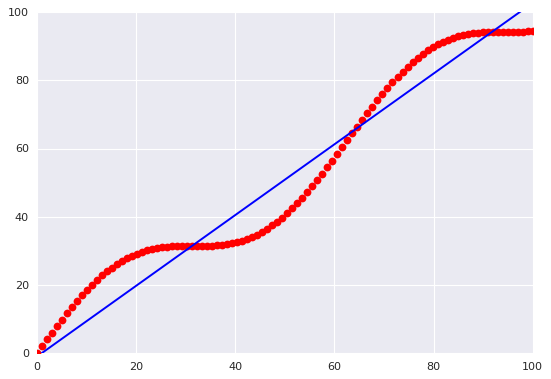

In [23]:
# 得られた w_outputとb_outputでグラフを表示する
t_output = x_line * w_output + b_output
plt.figure()
plt.ylim(0,100)
plt.plot(x_train,t_train,'ro',label='Data')
plt.plot(x_train,t_output,'b-')
plt.show()